   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


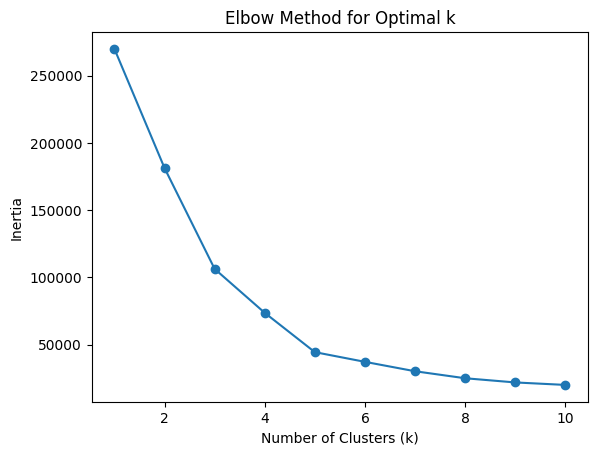

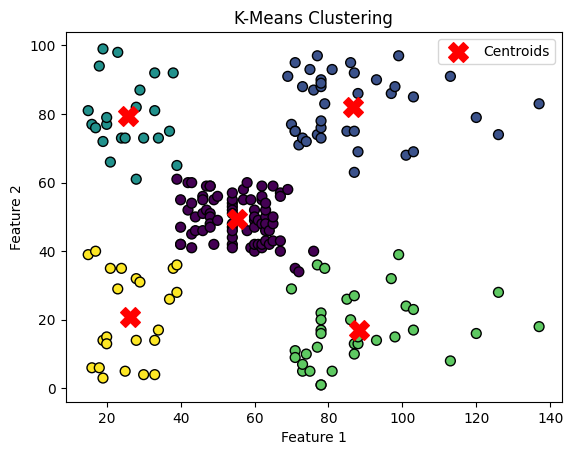

In [1]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd

# Load data from CSV file
data = pd.read_csv('mallcustomers.csv')
print(data.head())
x = data.iloc[:, [3, 4]].values  # Assuming the relevant features are in columns 3 and 4

# Elbow Method to find optimal number of clusters (k)
inertia = []
for i in range(1, 11):  # Trying k values from 1 to 10
    kmeans = KMeans(n_clusters=i, random_state=42,n_init=10)
    kmeans.fit(x)
    inertia.append(kmeans.inertia_)

# Plot the Elbow curve
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

# Based on the Elbow plot, choose the optimal k and perform clustering
optimal_k = 5  # Adjust based on the Elbow plot
kmeans = KMeans(n_clusters=optimal_k, random_state=42,n_init=10)
kmeans.fit(x)

# Get cluster assignments and centroids
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Plot the data points and cluster centroids
plt.scatter(x[:, 0], x[:, 1], c=labels, edgecolors='black', s=50)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()